In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

Getting the data


In [60]:
df=pd.read_csv("movies.csv")

In [61]:
df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
df.drop(df.columns[2], axis=1,inplace=True)

In [63]:
rating=pd.read_csv("ratings.csv")

In [64]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [65]:
rating=rating.drop(rating.columns[3],axis=1)

In [66]:
dfnew=pd.merge(rating,df,on="movieId")

In [67]:
dfnew.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [59]:
df.shape

(100836, 4)

In [68]:
dfnewto=pd.merge(df,rating,on="movieId")

In [69]:
dfnewto.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
dfnew.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [78]:
dfnew.groupby('title').count()['rating'].sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [79]:
raten=pd.DataFrame(dfnew.groupby("title").mean()['rating'])

In [83]:
raten.tail()

,rating,number of ratings
title,,
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5
¡Three Amigos! (1986),3.134615,26
À nous la liberté (Freedom for Us) (1931),1.000000,1


In [81]:
raten['number of ratings']=pd.DataFrame(dfnew.groupby('title').count()['rating'])

In [84]:
raten.sort_values(by='rating',ascending=False)

,rating,number of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


<function matplotlib.pyplot.show(close=None, block=None)>

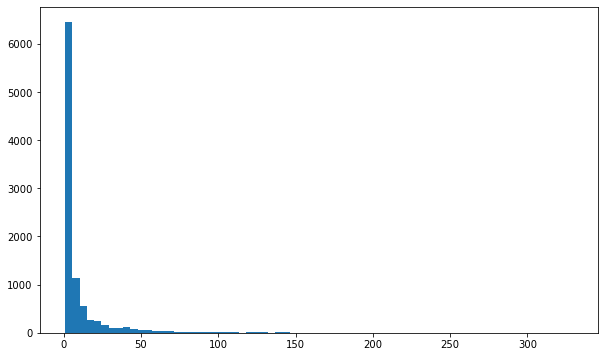

In [86]:
plt.figure(figsize=(10,6))
plt.hist(raten['number of ratings'],bins=70)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

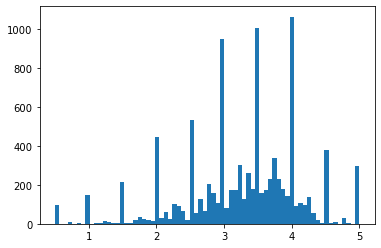

In [88]:
plt.hist(raten['rating'],bins=70)
plt.show

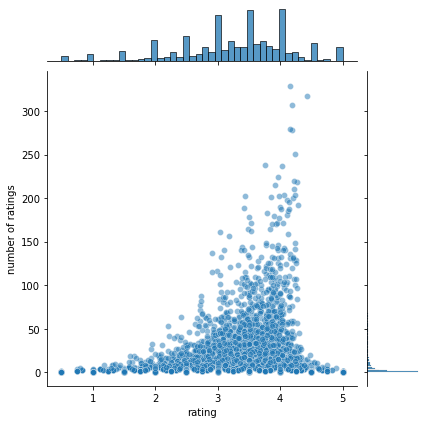

In [89]:
sns.jointplot(x='rating',y='number of ratings',data=raten,alpha=0.5)

In [90]:
dfnew.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [91]:
moviemat=dfnew.pivot_table(index='userId',columns='title', values='rating')

In [92]:
moviemat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [94]:
raten.sort_values('number of ratings', ascending=False).head()

,rating,number of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [97]:
forestgumprat=moviemat['Forrest Gump (1994)']

In [100]:
smforest=moviemat.corrwith(forestgumprat)

In [102]:
corrfor=pd.DataFrame(smforest, columns=['Correlation'])

In [105]:
corrfor.dropna(inplace=True)

In [106]:
corrfor.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [108]:
corrfor = corrfor.join(raten['number of ratings'])

In [109]:
corrfor.head()

,Correlation,number of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [112]:
corrfor[corrfor['number of ratings']>20].sort_values('Correlation',ascending=False).head(10)

,Correlation,number of ratings
title,,
Forrest Gump (1994),1.000000,329
Bio-Dome (1996),0.723238,31
Thor: The Dark World (2013),0.715809,21
Fatal Attraction (1987),0.701856,36
X-Men: Days of Future Past (2014),0.682284,30
National Lampoon's Vacation (1983),0.677043,26
Easy A (2010),0.670081,27
Bridesmaids (2011),0.663176,21
"Cabin in the Woods, The (2012)",0.653015,22


In [134]:
def predMov(moviename):
    movierat=moviemat[moviename]
    smmovie=moviemat.corrwith(movierat)
    corrmov=pd.DataFrame(smmovie, columns=['Correlation'])
    corrmov.dropna(inplace=True)
    corrmov = corrmov.join(raten['number of ratings'])
    predict=corrmov[corrmov['number of ratings']>100].sort_values('Correlation',ascending=False)
    return predict

In [140]:
predictions=predMov('Star Wars: Episode VI - Return of the Jedi (1983)')

In [141]:
predictions.head(10)

,Correlation,number of ratings
title,,
Star Wars: Episode VI - Return of the Jedi (1983),1.000000,196
Star Wars: Episode IV - A New Hope (1977),0.734230,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.643464,211
Good Will Hunting (1997),0.512112,141
"Firm, The (1993)",0.486314,101
Indiana Jones and the Temple of Doom (1984),0.464669,108
WALL·E (2008),0.428633,104
"Lord of the Rings: The Return of the King, The (2003)",0.400526,185
Star Wars: Episode I - The Phantom Menace (1999),0.388504,140
